# Import necessary libraries & Check the data



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("/content/BAT_DATASET.csv")

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Debug column names
print("Columns in dataset:", df.columns)

# Remove any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Sort data by Date
df.sort_values('Date', inplace=True)

# Check the data
print(df.head())

<ipython-input-3-9b6c069488da>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Columns in dataset: Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')
           Date   Open   High    Low  Close        Volume
4583 1997-07-07  15.40  15.40  15.40  15.40  16199.999060
4582 1997-07-08  15.21  15.21  15.21  15.21  27449.998408
4581 1997-07-09  15.28  15.28  15.28  15.28  19349.998878
4580 1997-07-10  15.27  15.27  15.27  15.27  31049.998199
4579 1997-07-14  13.79  13.79  13.79  13.79   5849.999661


# Bar Chart for Annual Trading Volume


<ipython-input-4-abfef81c91dd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Year', y='Volume', data=annual_volume, palette='viridis')


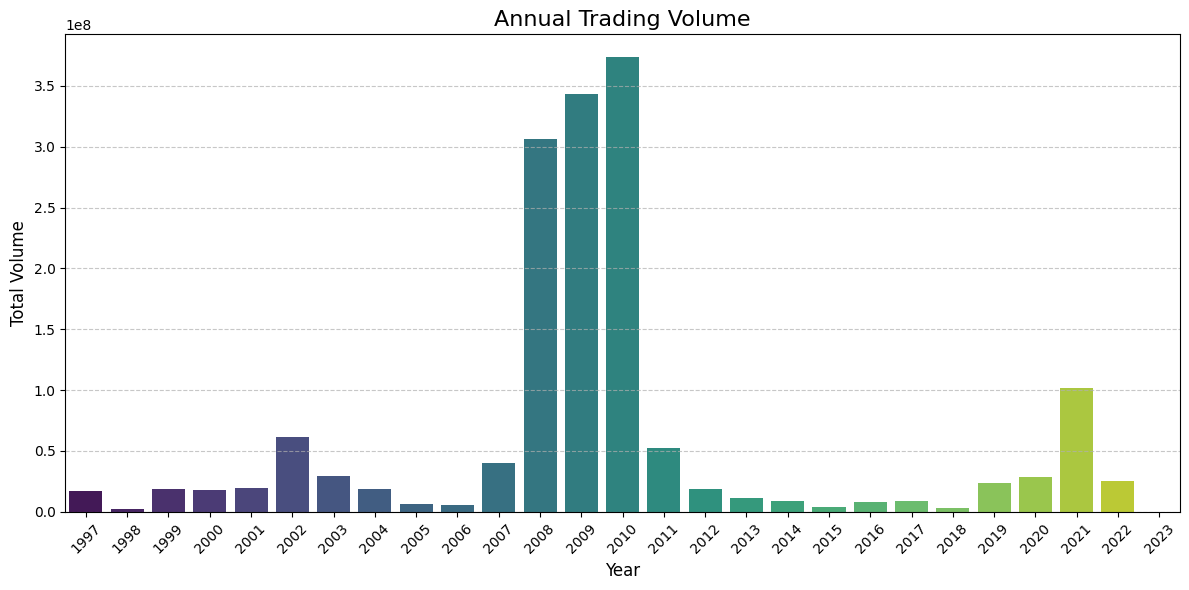

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Aggregate trading volume by year
annual_volume = df.groupby('Year')['Volume'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Volume', data=annual_volume, palette='viridis')

# Customize the chart
plt.title('Annual Trading Volume', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout is tight
plt.tight_layout()
plt.show()







# Stock Price Trends Over Time

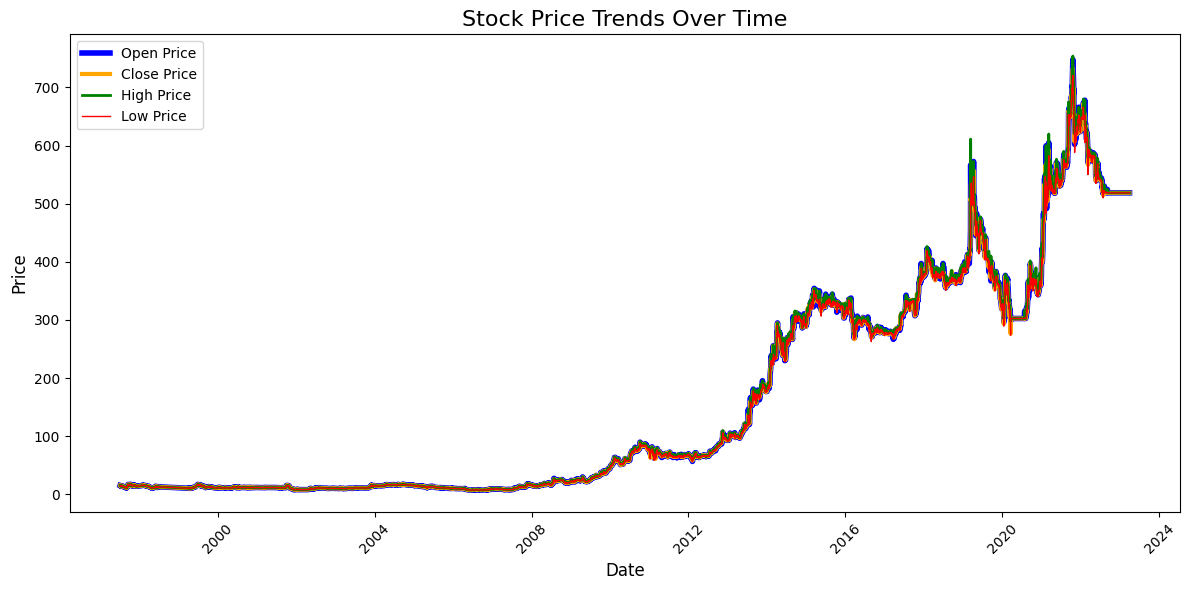

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot Open, Close, High, Low prices using Seaborn's lineplot
sns.lineplot(x='Date', y='Open', data=df, label='Open Price', color='blue', linewidth=4)
sns.lineplot(x='Date', y='Close', data=df, label='Close Price', color='orange', linewidth=3)
sns.lineplot(x='Date', y='High', data=df, label='High Price', color='green', linewidth=2)
sns.lineplot(x='Date', y='Low', data=df, label='Low Price', color='red', linewidth=1)

# Customize the chart
plt.title('Stock Price Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


# Daily Returns Distribution (Histogram)

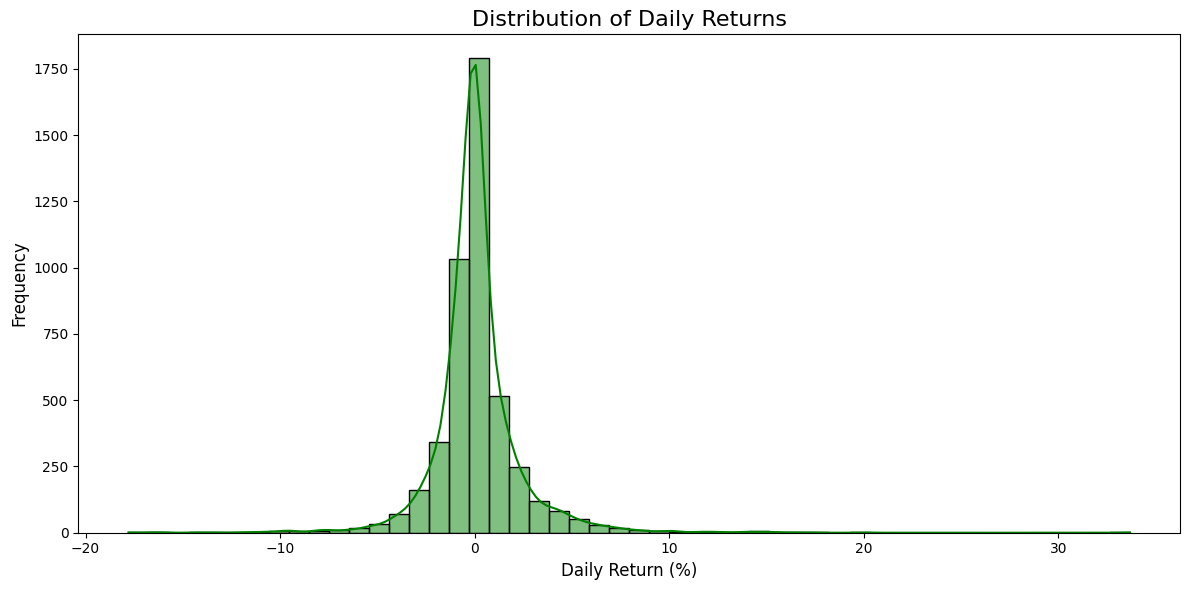

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Calculate daily returns as the percentage change in closing price
df['Daily_Return'] = df['Close'].pct_change() * 100  # Percentage change in close price

# Plotting the histogram for daily returns
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=50, color='green')

# Customize the chart
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


# Price Distribution for Open, Close, High, Low Prices

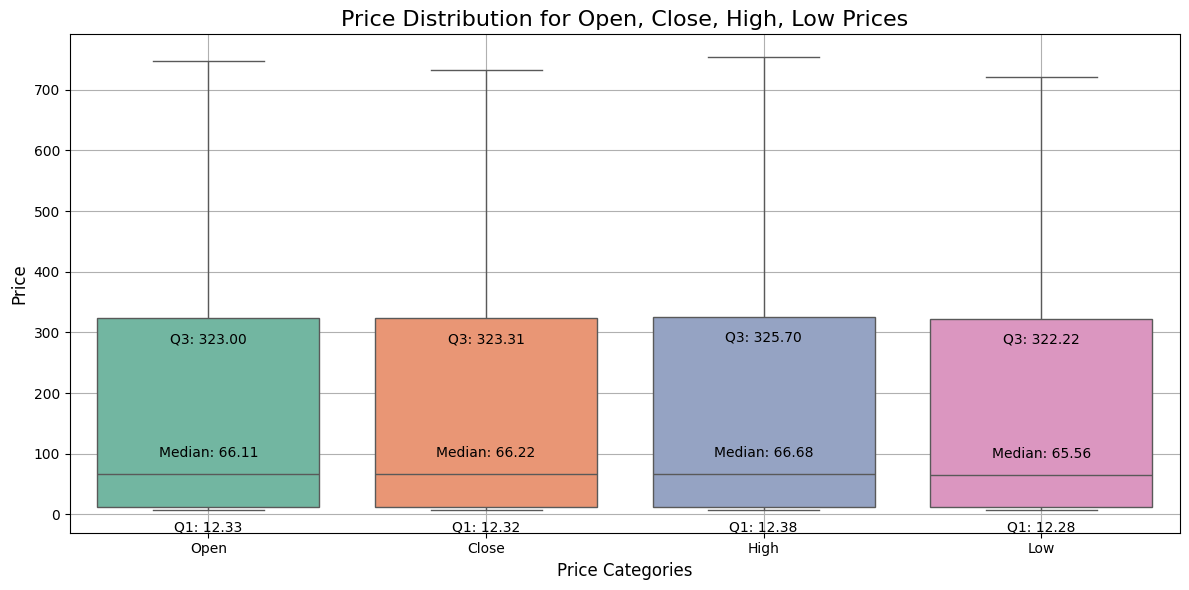

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create the box plot for stock prices: Open, Close, High, Low
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df[['Open', 'Close', 'High', 'Low']], palette='Set2')

# Customize the chart
plt.title('Price Distribution for Open, Close, High, Low Prices', fontsize=16)
plt.xlabel('Price Categories', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Add values to the box plot (median, quartiles, and outliers)
for i, col in enumerate(['Open', 'Close', 'High', 'Low']):
    # Get the stats for the box plot (e.g., median, quartiles)
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Annotate median value
    ax.annotate(f'Median: {median:.2f}',
                xy=(i, median),
                xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='black')

    # Annotate Q1 and Q3 (25th and 75th percentiles)
    ax.annotate(f'Q1: {q1:.2f}',
                xy=(i, q1),
                xytext=(0, -10), textcoords='offset points',
                ha='center', va='top', fontsize=10, color='black')

    ax.annotate(f'Q3: {q3:.2f}',
                xy=(i, q3),
                xytext=(0, -10), textcoords='offset points',
                ha='center', va='top', fontsize=10, color='black')

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


# Correlation Heatmap

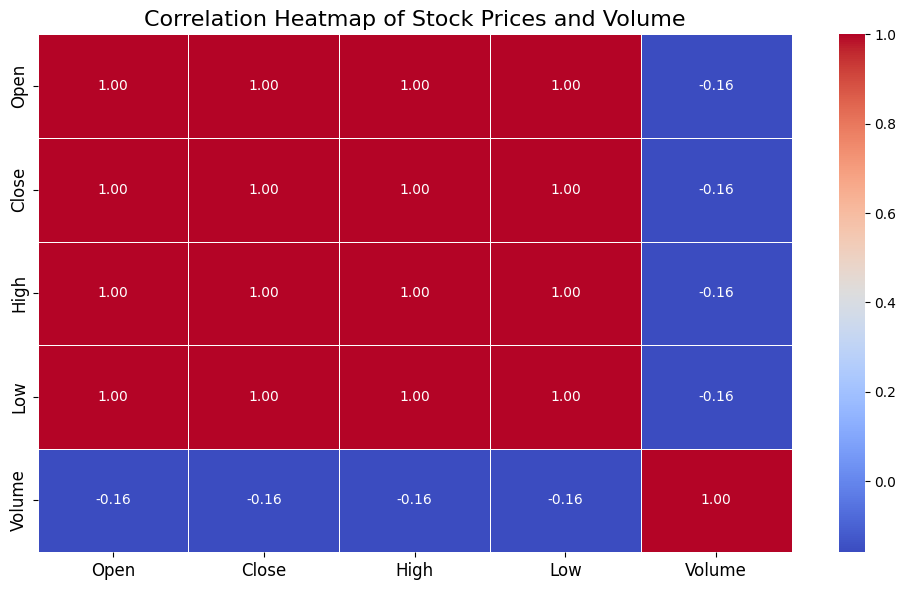

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_cols = ['Open', 'Close', 'High', 'Low', 'Volume']
correlation_matrix = df[numeric_cols].corr()  # Compute correlation matrix

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the chart
plt.title('Correlation Heatmap of Stock Prices and Volume', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


# Price Change vs. Trading Volume (Colored by Direction)

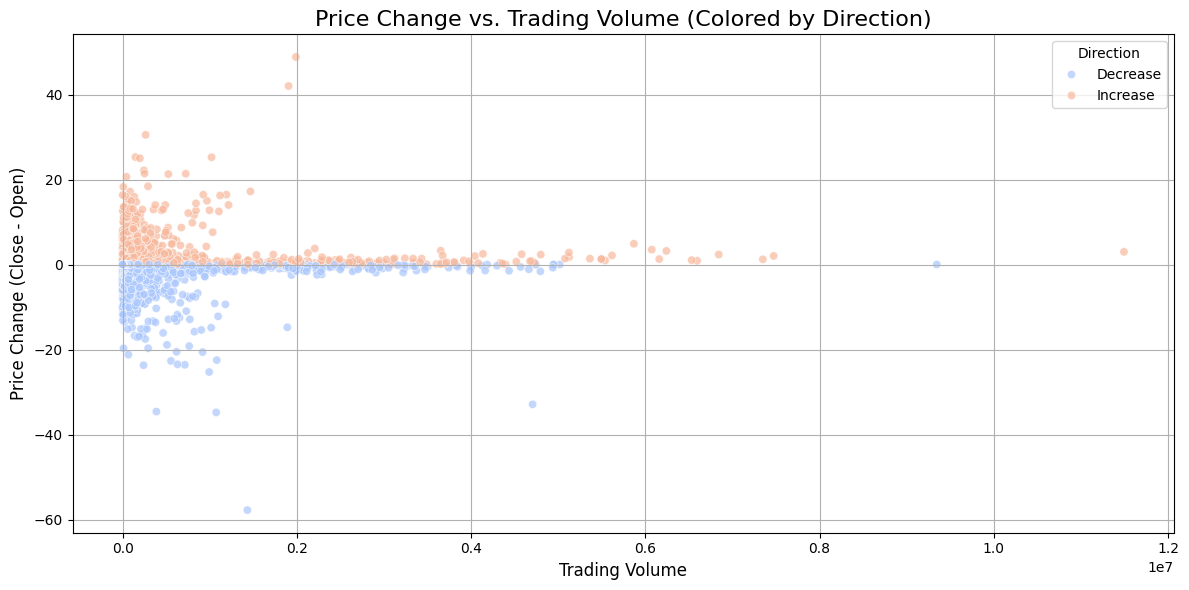

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the necessary columns exist
if 'Close' in df.columns and 'Open' in df.columns:
    # Calculate Price Change (Close - Open)
    df['Price_Change'] = df['Close'] - df['Open']
else:
    raise KeyError("The dataset does not contain 'Close_price' or 'Open_price' columns.")

# Create a new column for Price Direction
df['Direction'] = df['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volume', y='Price_Change', hue='Direction', data=df, palette='coolwarm', alpha=0.7)

# Customize the chart
plt.title('Price Change vs. Trading Volume (Colored by Direction)', fontsize=16)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Price Change (Close - Open)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Direction', fontsize=10)
plt.grid(True)

# Ensure layout is tight
plt.tight_layout()
plt.show()


# Pair Plot of Numeric Features

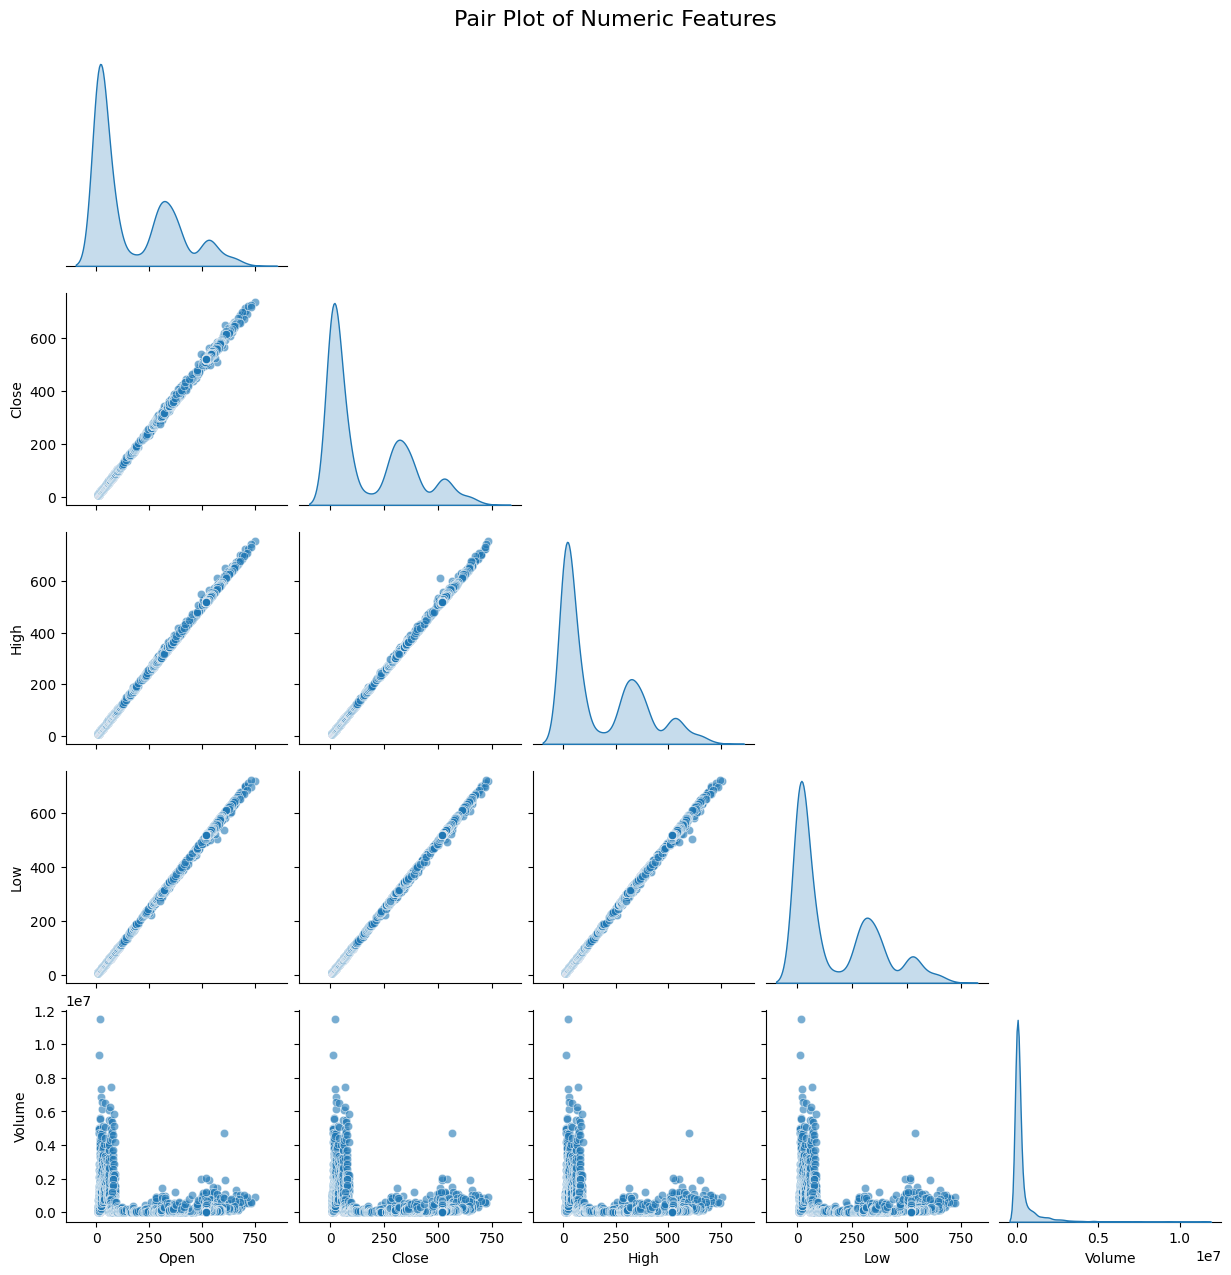

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features for the pair plot
numeric_cols = ['Open', 'Close', 'High', 'Low', 'Volume']

# Check if the columns exist
missing_cols = [col for col in numeric_cols if col not in df.columns]
if missing_cols:
    print(f"The following columns are missing from the dataset: {missing_cols}")
    raise KeyError("Missing required columns for pair plot.")

# Create the pair plot
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})

# Customize the plot
plt.suptitle('Pair Plot of Numeric Features', y=1.02, fontsize=16)
plt.show()


Volatility Over Time (Rolling Standard
Deviation)

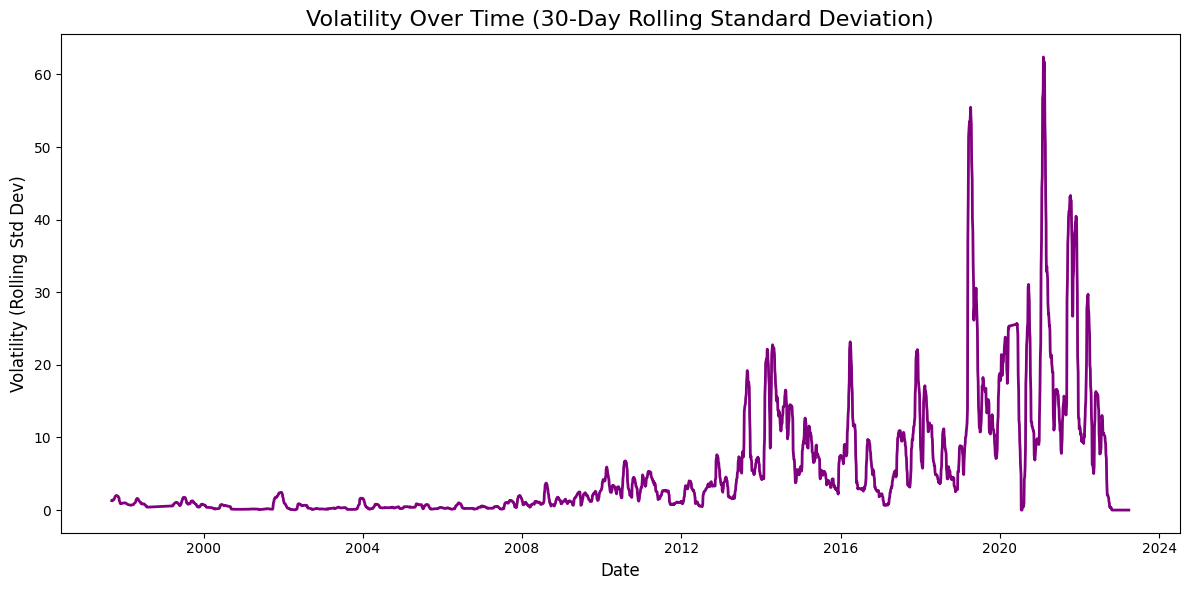

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the rolling standard deviation (volatility) over a 30-day window
df['Volatility'] = df['Close'].rolling(window=30).std()

# Create the line plot for volatility
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volatility', data=df, color='purple', linewidth=2)

# Customize the chart
plt.title('Volatility Over Time (30-Day Rolling Standard Deviation)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Rolling Std Dev)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()

